In [1]:
import random
import time
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# ----- Clase Original -----
class AnalizadorFinancieroOriginal:

    def calcular_total_ingresos(self, transacciones):
        total = 0
        for ingreso in transacciones:
            total += ingreso
        return total

    def filtrar_ingresos_altos(self, transacciones, umbral):
        ingresos_altos = []
        for ingreso in transacciones:
            if ingreso > umbral:
                ingresos_altos.append(ingreso)
        return ingresos_altos

    def agrupar_por_categoria(self, transacciones, categorias):
        agrupado = {}
        for categoria, ingreso in zip(categorias, transacciones):
            if categoria in agrupado:
                agrupado[categoria].append(ingreso)
            else:
                agrupado[categoria] = [ingreso]
        return agrupado

In [3]:
# ----- Clase Optimizada -----
class AnalizadorFinancieroOptimizado:

    def calcular_total_ingresos(self, transacciones):
        return sum(transacciones)

    def filtrar_ingresos_altos(self, transacciones, umbral):
        return [ingreso for ingreso in transacciones if ingreso > umbral]

    def agrupar_por_categoria(self, transacciones, categorias):
        agrupado = defaultdict(list)
        for cat, ingreso in zip(categorias, transacciones):
            agrupado[cat].append(ingreso)
        return dict(agrupado)


In [11]:
def generar_datos(n=10_000_000):
    transacciones = [random.randint(1, 1000) for _ in range(n)]
    categorias_posibles = ['Salud', 'Educación', 'Hogar', 'Ocio', 'Inversión']
    categorias = [random.choice(categorias_posibles) for _ in range(n)]
    return transacciones, categorias



In [12]:
def medir_tiempo(func, *args):
    inicio = time.time()
    func(*args)
    fin = time.time()
    return fin - inicio

In [5]:
    N = 10_000_000
    print(f"Generando {N} transacciones...")
    transacciones, categorias = generar_datos(N)
    umbral = 800

    print("Comparando calcular_total_ingresos...")
    original = AnalizadorFinancieroOriginal()
    optimizado = AnalizadorFinancieroOptimizado()

    _, t_orig = medir_tiempo(original.calcular_total_ingresos, transacciones)
    _, t_opt = medir_tiempo(optimizado.calcular_total_ingresos, transacciones)
    print(f"Original: {t_orig:.4f} seg | Optimizado: {t_opt:.4f} seg\n")

    print("Comparando filtrar_ingresos_altos...")
    _, t_orig = medir_tiempo(original.filtrar_ingresos_altos, transacciones, umbral)
    _, t_opt = medir_tiempo(optimizado.filtrar_ingresos_altos, transacciones, umbral)
    print(f"Original: {t_orig:.4f} seg | Optimizado: {t_opt:.4f} seg\n")

    print("Comparando agrupar_por_categoria...")
    _, t_orig = medir_tiempo(original.agrupar_por_categoria, transacciones, categorias)
    _, t_opt = medir_tiempo(optimizado.agrupar_por_categoria, transacciones, categorias)
    print(f"Original: {t_orig:.4f} seg | Optimizado: {t_opt:.4f} seg\n")

Generando 10000000 transacciones...
Comparando calcular_total_ingresos...
Original: 0.3840 seg | Optimizado: 0.0687 seg

Comparando filtrar_ingresos_altos...
Original: 0.2958 seg | Optimizado: 0.2558 seg

Comparando agrupar_por_categoria...
Original: 1.4466 seg | Optimizado: 0.9614 seg



In [13]:
tamaños = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]


In [14]:
# ---------- Instancias ----------
original = AnalizadorFinancieroOriginal()
optimizado = AnalizadorFinancieroOptimizado()


In [15]:
# ---------- Inicializar resultados ----------
resultados = {
    "calcular_total_ingresos": {"original": [], "optimizado": []},
    "filtrar_ingresos_altos": {"original": [], "optimizado": []},
    "agrupar_por_categoria": {"original": [], "optimizado": []},
}


In [16]:
# ---------- Benchmark ----------
for n in tamaños:
    transacciones = [random.randint(1, 1000) for _ in range(n)]
    categorias = [random.choice(['A', 'B', 'C', 'D', 'E']) for _ in range(n)]
    umbral = 800

    # calcular_total_ingresos
    resultados["calcular_total_ingresos"]["original"].append(
        medir_tiempo(original.calcular_total_ingresos, transacciones))
    resultados["calcular_total_ingresos"]["optimizado"].append(
        medir_tiempo(optimizado.calcular_total_ingresos, transacciones))

    # filtrar_ingresos_altos
    resultados["filtrar_ingresos_altos"]["original"].append(
        medir_tiempo(original.filtrar_ingresos_altos, transacciones, umbral))
    resultados["filtrar_ingresos_altos"]["optimizado"].append(
        medir_tiempo(optimizado.filtrar_ingresos_altos, transacciones, umbral))

    # agrupar_por_categoria
    resultados["agrupar_por_categoria"]["original"].append(
        medir_tiempo(original.agrupar_por_categoria, transacciones, categorias))
    resultados["agrupar_por_categoria"]["optimizado"].append(
        medir_tiempo(optimizado.agrupar_por_categoria, transacciones, categorias))

In [17]:
def graficar(func_name):
    plt.figure(figsize=(10, 6))
    plt.plot(tamaños, resultados[func_name]["original"], marker='o', label="Original")
    plt.plot(tamaños, resultados[func_name]["optimizado"], marker='s', label="Optimizado")
    plt.xscale('log')
    plt.xlabel("Cantidad de Datos (escala log)")
    plt.ylabel("Tiempo de Ejecución (s)")
    plt.title(f"Rendimiento: {func_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


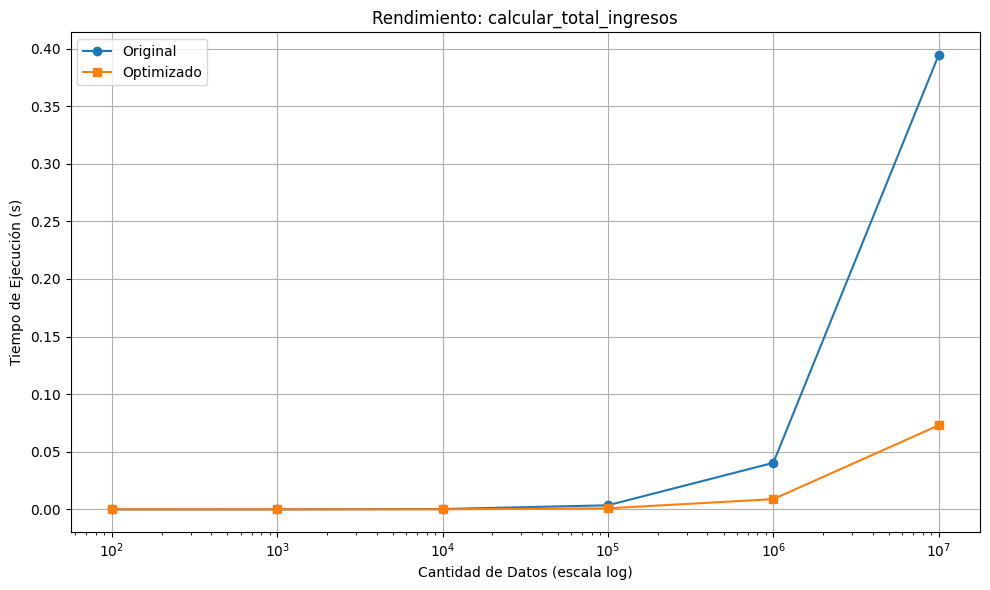

In [18]:
# Ejecutar gráficos
graficar("calcular_total_ingresos")


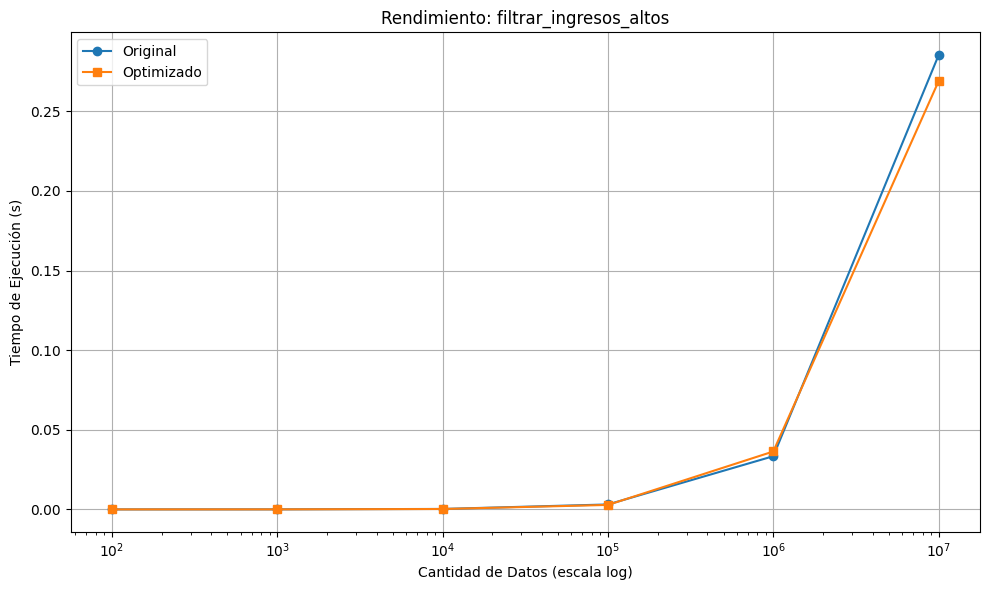

In [19]:
graficar("filtrar_ingresos_altos")


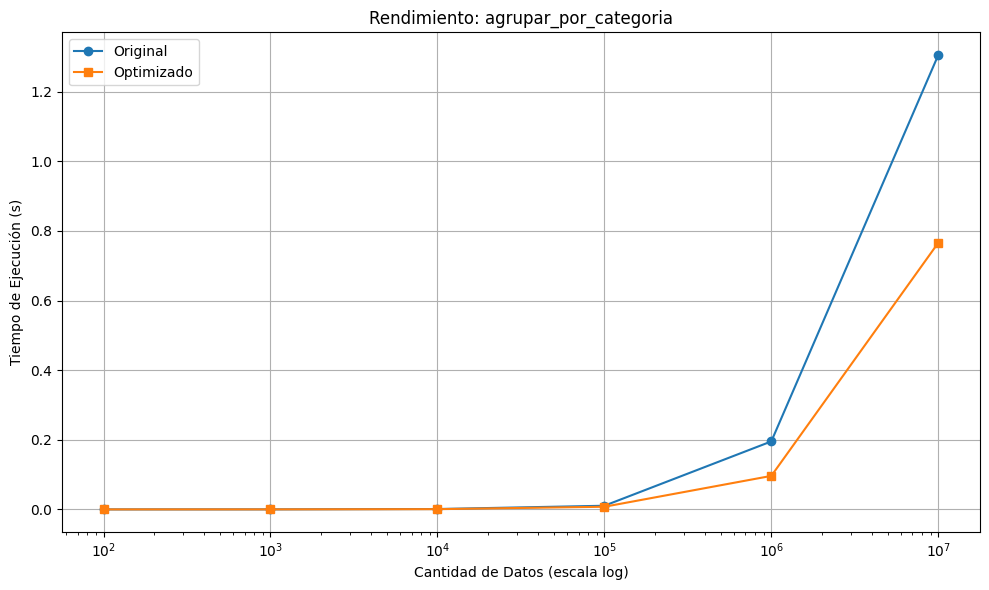

In [20]:
graficar("agrupar_por_categoria")